In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('height.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [6]:
df.shape

(10000, 2)

In [11]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [13]:
df.gender.describe()

count     10000
unique        2
top        Male
freq       5000
Name: gender, dtype: object

In [18]:
df[df.gender == 'Male'].describe()


,height
count,5000.000000
mean,69.026346
std,2.863362
min,58.406905
25%,67.174679
50%,69.027709
75%,70.988744
max,78.998742


In [17]:
df[df.gender == 'Female'].describe()

,height
count,5000.000000
mean,63.708774
std,2.696284
min,54.263133
25%,61.894441
50%,63.730924
75%,65.563565
max,73.389586


# plot bell curve along with histogram for our dataset

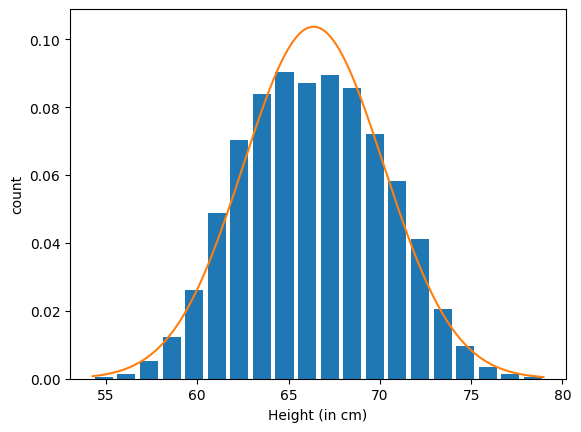

In [64]:
from scipy.stats import norm

def hist_plt(df):
    plt.hist( df.height,  bins=20, rwidth=0.8 , density=True)
    plt.ylabel('count')
    plt.xlabel('Height (in cm)')

    rng = np.arange(df.height.min() , df.height.max() , 0.1)
    plt.plot(rng ,norm.pdf(rng,df.height.mean(),df.height.std()) )

    plt.show()


hist_plt(df)

# 1. Detect outliers using percentile

In [72]:
# count    10000.000000
# mean        66.367560
# std          3.847528
# min         54.263133
# 25%         63.505620
# 50%         66.318070
# 75%         69.174262
# max         78.998742

def Remove_Outliers_Percentile(df , percentiles):
    new_df = pd.DataFrame()
    for gender,gender_df in df.groupby('gender'):

        min_threshold , max_threshold = gender_df['height'].quantile(percentiles)

        print(gender ,min_threshold, max_threshold  )

        reduced_df = gender_df[ (gender_df.height < max_threshold) & (gender_df.height > min_threshold) ]

        new_df = pd.concat( [reduced_df ,new_df] , ignore_index=True)     

    print()
    return new_df


# Explore samples that are between 95% percentile and  5% percentile rank
df1 = Remove_Outliers_Percentile(df , [0.05 , 0.95])

# Explore samples that are between 99.7% percentile 1% percentile rank
df2 = Remove_Outliers_Percentile(df , [0.003 , 0.997])

print(df.shape)
print(df1.shape)
print(df1.shape)

Female 59.266210405 68.13975789050001
Male 64.32805424600001 73.69731761749999

Female 56.15930635224 70.74211388302
Male 60.82020638521 76.80645264556999

(10000, 2)
(9000, 2)
(9000, 2)


In [69]:
df.groupby('gender').describe()


height                                                        \
         count       mean       std        min        25%        50%   
gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              
              75%        max  
gender                        
Female  65.563565  73.389586  
Male    70.988744  78.998742

In [70]:
df1.groupby('gender').describe()

height                                                        \
         count       mean       std        min        25%        50%   
gender                                                                 
Female  4500.0  63.713570  2.130867  59.266303  62.077755  63.730924   
Male    4500.0  69.039578  2.241380  64.328580  67.385402  69.027709   

                              
              75%        max  
gender                        
Female  65.308056  68.139611  
Male    70.791550  73.696859

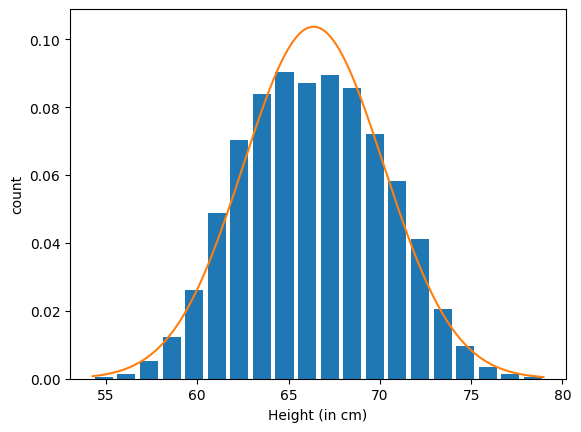

In [65]:
hist_plt(df)

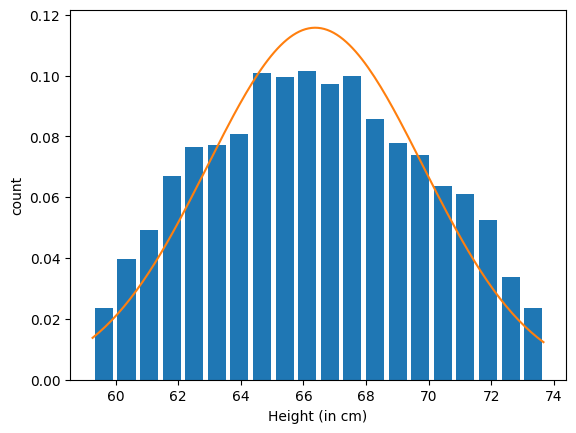

In [66]:
hist_plt(df1)

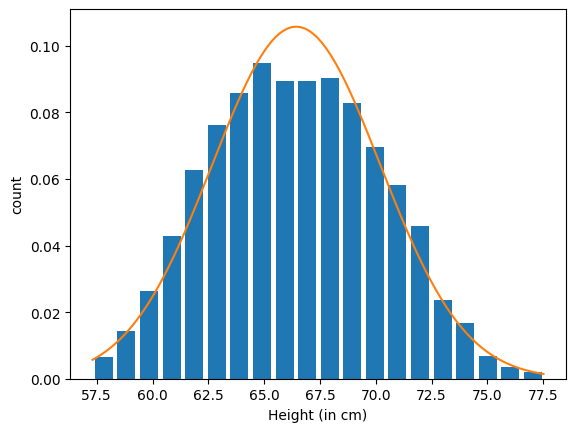

In [71]:
hist_plt(df2)


# 2. Outlier detection and removal using 3 standard deviation

In [74]:
def Remove_Outliers_STD(df , std):
    new_df = pd.DataFrame()

    for gender,gender_df in df.groupby('gender'):

        upper_limit =  gender_df['height'].mean() + std * gender_df['height'].std() 
        lower_limit =  gender_df['height'].mean() - std * gender_df['height'].std() 

        print(gender ,upper_limit, lower_limit  )

        reduced_df = gender_df[ (gender_df.height < upper_limit) & (gender_df.height > lower_limit) ]

        new_df = pd.concat( [reduced_df ,new_df] , ignore_index=True)     

    print()
    return new_df
    

* About 68% of the data falls within 1 standard deviation of the mean. \n
* About 95% of the data falls within 2 standard deviations of the mean. \n
* About 99.7% of the data falls within 3 standard deviations of the mean. \n

In [93]:
df1 = Remove_Outliers_STD(df , 3)
df1.shape

Female 71.79762565082967 55.61992155608634
Male 77.61643259229817 60.43625922024984



(9975, 2)

# 3. Outlier detection and removal using Z Score
Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

z = (x-mean) / std


In [95]:
def Remove_Outliers_ZScore(df , z ):
    new_df = pd.DataFrame()

    for gender,gender_df in df.groupby('gender'):

        gender_df['zscore'] = ( gender_df.height - gender_df.height.mean() ) / gender_df.height.std()
        new_df = pd.concat( [new_df ,gender_df] , ignore_index=True)     

    new_df = new_df[  (new_df.zscore < z) &  (new_df.zscore > -z)  ]

    return new_df

df4 = Remove_Outliers_ZScore(df , 3 )

df4.shape    

(9975, 3)

<!-- Above for first record with height 58.91, z score is -1.94. This means58.91 is -1.93 standard deviation away from mean -->

Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

# 4. Remove Outlier using IQR (Inter Quartile Range)

In [100]:
def Remove_Outliers_IQR(df  ):
    new_df = pd.DataFrame()

    for gender,gender_df in df.groupby('gender'):
        Q1 = gender_df.height.quantile(0.25)
        Q3 = gender_df.height.quantile(0.75)

        IQR = Q3 - Q1

        print(gender , IQR)

        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR

        reduced_df = gender_df[  (gender_df.height < upper_limit) &  (gender_df.height > lower_limit)  ]

        new_df = pd.concat( [new_df ,reduced_df] , ignore_index=True)     

    return new_df

df4 = Remove_Outliers_IQR(df  )
df4.shape

Female 3.669123697499998
Male 3.8140645625000076


(9927, 2)